Learning transferability of school data set
-----

We will start by reading in the data and transforming the grades to a 5-level classification following the source paper.

In [54]:
import pandas as pd
import numpy as np
dMat = pd.read_csv('Data/student-mat.csv')
dPor = pd.read_csv('Data/student-por.csv')

def grade_to_class(x: int) -> int:
    if x < 10:
        return 5
    elif x < 12:
        return 4
    elif x < 14:
        return 3
    elif x < 16:
        return 2
    else:
        return 1

dMat[['G1', 'G2', 'G3']] = dMat[['G1', 'G2', 'G3']].applymap(grade_to_class)
dPor[['G1', 'G2', 'G3']] = dPor[['G1', 'G2', 'G3']].applymap(grade_to_class)

dMat['course'] = 'mat'
dPor['course'] = 'por'

dTotR = dMat.append(dPor, ignore_index=True)

display(dTotR)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F   18       U     GT3       A     4     4   at_home   teacher   
1        GP   F   17       U     GT3       T     1     1   at_home     other   
2        GP   F   15       U     LE3       T     1     1   at_home     other   
3        GP   F   15       U     GT3       T     4     2    health  services   
4        GP   F   16       U     GT3       T     3     3     other     other   
...     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
1039     MS   F   19       R     GT3       T     2     3  services     other   
1040     MS   F   18       U     LE3       T     3     1   teacher  services   
1041     MS   F   18       U     GT3       T     1     1     other     other   
1042     MS   M   17       U     LE3       T     3     1  services  services   
1043     MS   M   18       R     LE3       T     3     2  services     other   

      ... freetime goout  Dalc  Walc  health absences G1 G2 G3 course  
0     ...        3     4     1     1       3        6  5  5  5    mat  
1     ...        3     3     1     1       3        4  5  5  5    mat  
2     ...        3     2     2     3       3       10  5  5  4    mat  
3     ...        2     2     1     1       5        2  2  2  2    mat  
4     ...        3     2     1     2       5        4  5  4  4    mat  
...   ...      ...   ...   ...   ...     ...      ... .. .. ..    ...  
1039  ...        4     2     1     2       5        4  4  4  4    por  
1040  ...        3     4     1     1       1        4  2  2  1    por  
1041  ...        1     1     1     1       5        6  4  3  5    por  
1042  ...        4     5     3     4       2        6  4  4  4    por  
1043  ...        4     1     3     4       5        4  4  4  4    por  

[1044 rows x 34 columns]

We will now preprocess the data to prepare it for the models. We will be doing a few things:
1. We first transform all nominal data to ordinal data.
2. We normalise the data
3. We apply PCA to the data
4. We extract all different groups that we test or train on

In [2]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

dTot = pd.get_dummies(dTotR, drop_first=True)

grade_cols = ['G1', 'G2', 'G3']
static_cols = ['school_MS', 'course_por'] + grade_cols
non_static_cols = list(dTot.columns.difference(static_cols))
dTot[non_static_cols] = normalize(dTot.drop(static_cols, axis=1))

pca = PCA(svd_solver='full', n_components=13)
dPCA = pca.fit_transform(dTot.drop(static_cols, axis=1))
pca_cols = [f'pca_{x}' for x in range(pca.n_components_)]

dPCA = pd.DataFrame(dPCA, columns=pca_cols)

dMat = dTot[dTot['course_por'] == 0].drop(['course_por'], axis=1)
dPor = dTot[dTot['course_por'] == 1].drop(['course_por'], axis=1)

dMatMS = dMat[dMat['school_MS'] == 1].drop(['school_MS'], axis=1)
dMatGP = dMat[dMat['school_MS'] == 0].drop(['school_MS'], axis=1)

dPorMS = dPor[dPor['school_MS'] == 1].drop(['school_MS'], axis=1)
dPorGP = dPor[dPor['school_MS'] == 0].drop(['school_MS'], axis=1)

dMatMS[pca_cols] = dPCA[(dTot['course_por'] == 0) & (dTot['school_MS'] == 1)]
dMatGP[pca_cols] = dPCA[(dTot['course_por'] == 0) & (dTot['school_MS'] == 0)]
dPorMS[pca_cols] = dPCA[(dTot['course_por'] == 1) & (dTot['school_MS'] == 1)]
dPorGP[pca_cols] = dPCA[(dTot['course_por'] == 1) & (dTot['school_MS'] == 0)]

display(dMatMS)

age      Medu      Fedu  traveltime  studytime  failures    famrel  \
349  0.041523  0.083045  0.124568    0.000000   0.041523  0.000000  0.041523   
350  0.043153  0.215766  0.043153    0.000000   0.043153  0.000000  0.043153   
351  0.049447  0.197787  0.148340    0.000000   0.049447  0.049447  0.000000   
352  0.047088  0.188353  0.047088    0.047088   0.047088  0.000000  0.000000   
353  0.045129  0.180517  0.045129    0.000000   0.045129  0.000000  0.045129   
354  0.048224  0.192897  0.192897    0.048224   0.048224  0.000000  0.000000   
355  0.048113  0.240563  0.144338    0.048113   0.000000  0.000000  0.000000   
356  0.048853  0.195413  0.195413    0.000000   0.048853  0.000000  0.000000   
357  0.000000  0.052200  0.156599    0.052200   0.000000  0.000000  0.000000   
358  0.050443  0.151330  0.050443    0.050443   0.050443  0.000000  0.050443   
359  0.049875  0.249377  0.049875    0.000000   0.049875  0.000000  0.000000   
360  0.000000  0.190046  0.047511    0.047511   0.000000  0.000000  0.000000   
361  0.048507  0.194029  0.048507    0.000000   0.000000  0.000000  0.000000   
362  0.049447  0.197787  0.148340    0.049447   0.049447  0.000000  0.000000   
363  0.052058  0.104116  0.208232    0.052058   0.052058  0.000000  0.000000   
364  0.054473  0.163420  0.054473    0.000000   0.000000  0.000000  0.054473   
365  0.048280  0.144841  0.048280    0.000000   0.000000  0.000000  0.000000   
366  0.047727  0.190910  0.190910    0.047727   0.047727  0.000000  0.000000   
367  0.053529  0.267644  0.053529    0.053529   0.053529  0.000000  0.053529   
368  0.049386  0.246932  0.098773    0.049386   0.049386  0.000000  0.000000   
369  0.043033  0.129099  0.172133    0.043033   0.043033  0.000000  0.043033   
370  0.047619  0.142857  0.142857    0.047619   0.000000  0.000000  0.000000   
371  0.049088  0.196352  0.049088    0.049088   0.049088  0.000000  0.000000   
372  0.048507  0.145521  0.097014    0.048507   0.000000  0.000000  0.048507   
373  0.041885  0.125656  0.041885    0.000000   0.041885  0.000000  0.041885   
374  0.047782  0.238909  0.191127    0.000000   0.047782  0.000000  0.047782   
375  0.049207  0.196827  0.049207    0.000000   0.049207  0.000000  0.049207   
376  0.043685  0.218426  0.174741    0.043685   0.043685  0.043685  0.000000   
377  0.046324  0.231621  0.185296    0.000000   0.046324  0.000000  0.000000   
378  0.050637  0.202548  0.151911    0.050637   0.050637  0.000000  0.050637   
379  0.038547  0.154189  0.115642    0.000000   0.038547  0.000000  0.000000   
380  0.047836  0.143509  0.191346    0.000000   0.047836  0.000000  0.000000   
381  0.047405  0.189618  0.094809    0.047405   0.047405  0.000000  0.047405   
382  0.051571  0.206284  0.103142    0.000000   0.051571  0.000000  0.051571   
383  0.047619  0.190476  0.047619    0.000000   0.000000  0.000000  0.047619   
384  0.039590  0.197952  0.158362    0.000000   0.000000  0.000000  0.039590   
385  0.048507  0.242536  0.097014    0.000000   0.000000  0.000000  0.000000   
386  0.044721  0.178885  0.178885    0.044721   0.044721  0.000000  0.000000   
387  0.046274  0.231372  0.092549    0.000000   0.046274  0.000000  0.000000   
388  0.050379  0.201517  0.151138    0.000000   0.050379  0.000000  0.000000   
389  0.051778  0.051778  0.051778    0.000000   0.000000  0.000000  0.051778   
390  0.000000  0.193023  0.077209    0.000000   0.000000  0.000000  0.000000   
391  0.050252  0.100504  0.150756    0.000000   0.050252  0.000000  0.000000   
392  0.042448  0.212238  0.042448    0.000000   0.000000  0.000000  0.042448   
393  0.047782  0.191127  0.143346    0.000000   0.047782  0.000000  0.000000   
394  0.046474  0.139422  0.046474    0.000000   0.046474  0.000000  0.046474   

     freetime     goout      Dalc  ...     pca_3     pca_4     pca_5  \
349       0.0  0.041523  0.747409  ...  0.036242 -0.031104  0.023726   
350       0.0  0.000000  0.819911  ...  0.049898  0.024833  0.042403   
351       0.0  0.049447  0.840596

We set the mathetmatics course of GP as our training set and the other 3 groups as our testing set

In [3]:
X_MatGP = dMatGP.drop(grade_cols, axis=1)
y_MatGP = dMatGP['G3']

X_MatMS = dMatMS.drop(grade_cols, axis=1)
y_MatMS = dMatMS['G3']

X_PorGP = dPorGP.drop(grade_cols, axis=1)
y_PorGP = dPorGP['G3']

X_PorMS = dPorMS.drop(grade_cols, axis=1)
y_PorMS = dPorMS['G3']

X_train = X_MatGP
y_train = y_MatGP

X_test  = X_MatMS.append(X_PorGP).append(X_PorMS)
y_test  = y_MatMS.append(y_PorGP).append(y_PorMS)

Help functions
------

## gridsearch
We perform a gridsearch on the specified model with the provided parameters. In the end the model is refitted with the best parameters on the training dataset.

We then show the training score of the model, the test score and the score per group. Lastly we show the best parameters for the model and show the performance of the other parameter combinations

## confusion_m
We display a confusion matrix for the train and test dataset and a matrix for each seperate group.

## plot_dt
We plot the decision tree using some common parameters.

## plot_roc
A multiclass ROC curve is plotted with a line for each class and the AUC for that class.

In [81]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from itertools import cycle

def gridsearch(model, parameters):
    clf = GridSearchCV(
        model, 
        parameters, 
        scoring='balanced_accuracy', 
        cv=RepeatedStratifiedKFold(), 
        verbose=0, n_jobs=-1
    )

    clf.fit(X_train, y_train)
    
    print("training balanced_accuracy: ", clf.best_score_)
    print("testing balanced_accuracy:  ", clf.score(X_test, y_test))
    print("testing normal accuracy:    ", accuracy_score(y_test, clf.predict(X_test)))
    print("balanced_accuracy for sperate parts of the data:")
    scores = [[clf.score(X_MatGP, y_MatGP),
               clf.score(X_MatMS, y_MatMS),
               clf.score(X_PorGP, y_PorGP),
               clf.score(X_PorMS, y_PorMS)]]
    display(pd.DataFrame(scores, columns=["MatGP", "MatMS", "PorGP", "PorMS"]))
    print("best strategy: ", clf.best_params_)
    
    cols = ['param_' + k for k in parameters.keys()] \
           + ['mean_test_score', 'std_test_score', 'rank_test_score']
    
    display(pd.DataFrame.from_dict(clf.cv_results_).sort_values(by=['rank_test_score']).head(10)[cols])
    
    return clf

def confusion_m(model, name):
    fig, axs = plt.subplots(3, 2, figsize=(13,13))
    
    plot_confusion_matrix(model, X_train, y_train, ax=axs[0,0])
    axs[0,0].set_title(f"Confusion matrix for train data")
    
    plot_confusion_matrix(model, X_test, y_test, ax=axs[0,1])
    axs[0,1].set_title(f"Confusion matrix for test data")
    
    plot_confusion_matrix(model, X_MatGP, y_MatGP, ax=axs[1,0])
    axs[1,0].set_title("Confusion matrix for Mat-GP data")
    
    plot_confusion_matrix(model, X_MatMS, y_MatMS, ax=axs[1,1])
    axs[1,1].set_title("Confusion matrix for Mat-MS data")
    
    plot_confusion_matrix(model, X_PorGP, y_PorGP, ax=axs[2,0])
    axs[2,0].set_title("Confusion matrix for Por-GP data")
    
    plot_confusion_matrix(model, X_PorMS, y_PorMS, ax=axs[2,1])
    axs[2,1].set_title("Confusion matrix for Por-MS data")
    
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
def plot_dt(model):
    plt.figure(figsize=(200,30))
    plot_tree(
        model, 
        feature_names=X_train.columns, 
        class_names=["I", "II", "III", "IV", "V"], 
        filled=True,
        rounded=True,
    )
    
def plot_fi(model, name):
    dFI = pd.DataFrame(model.feature_importances_.reshape((1,51)), columns=X_test.columns).sort_values([0], 1, False)
    display(dFI)
    plt.figure(figsize=(12,5))
    plt.bar(range(51), dFI.values[0], color='#e62272')
    plt.title(f"Importance of features in model {name}")
    plt.xticks(range(51), dFI.columns, rotation='vertical')
    plt.ylabel("Importance on a scale from 0 to 1")
    pass
    
def plot_roc(model, name):
    try:
        y_score = model.best_estimator_.predict_proba(X_test)
    except:
        y_score = model.best_estimator_.decision_function(X_test)
    
    n_classes = 5
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i + 1, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    colors = cycle(['blue', 'red', 'green', 'yellow', 'magenta'])
    plt.figure(figsize=(10,5))
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1,
                 label=f'ROC curve of class {i+1} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for Test data in model {name}')
    plt.legend(loc="lower right")
    plt.show()

Dummy
-----

The only parameters for dummy is strategy as this is the only hyper parameter. We have chosen to leave out 'constant', as we know for certain it would perform badly.

In [5]:
from sklearn.dummy import DummyClassifier

parameters = {
    'strategy': ['stratified', 'most_frequent', 'prior', 'uniform']
}

dummy = gridsearch(DummyClassifier(), parameters)

training balanced_accuracy:  0.2005971125208977
testing balanced_accuracy:   0.23148422355208836
testing normal accuracy:     0.218705035971223
balanced_accuracy for sperate parts of the data:


MatGP     MatMS     PorGP     PorMS
0  0.196302  0.227591  0.182104  0.210496

best strategy:  {'strategy': 'stratified'}


param_strategy  mean_test_score  std_test_score  rank_test_score
0     stratified         0.200597    4.125024e-02                1
1  most_frequent         0.200000    5.551115e-17                2
2          prior         0.200000    5.551115e-17                2
3        uniform         0.193866    4.635867e-02                4

Decision tree
------

The parameters for the gridsearch are:
 - `criterion`: the two possible criteria
 - `splitter`: again the two possible splitters
 - `max_depth`: from 1 to 19 in increments of 2, this is chosen as to mimick the original paper and to have the abbility to compare ours with theirs
 - `ccp_alpha`: a value from 0 to 0.35 in increments of 0.05, these values where chosen to test if post pruning would be effective

No pre-pruning was attempted as it would greatly increase training time and not have any possitive effects.

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1,20, 2)) + [None],
    'ccp_alpha': [x / 20.0 for x in range(8)],
}

dt = gridsearch(DecisionTreeClassifier(), parameters)

training balanced_accuracy:  0.2662516786424715
testing balanced_accuracy:   0.24642119288627776
testing normal accuracy:     0.25323741007194245
balanced_accuracy for sperate parts of the data:


MatGP     MatMS    PorGP     PorMS
0    1.0  0.216597  0.27498  0.182518

best strategy:  {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}


param_criterion param_splitter param_max_depth param_ccp_alpha  \
21            gini         random            None               0   
31         entropy         random               9               0   
37         entropy         random              15               0   
17            gini         random              17               0   
39         entropy         random              17               0   
15            gini         random              15               0   
19            gini         random              19               0   
70         entropy           best               5            0.05   
80         entropy           best              15            0.05   
72         entropy           best               7            0.05   

    mean_test_score  std_test_score  rank_test_score  
21         0.266252        0.050690                1  
31         0.265783        0.055121                2  
37         0.264245        0.052286                3  
17         0.263694        0.058185                4  
39         0.261262        0.056254                5  
15         0.260843        0.052763                6  
19         0.260484        0.057502                7  
70         0.260180        0.040427                8  
80         0.259077        0.040192                9  
72         0.259077        0.040192                9

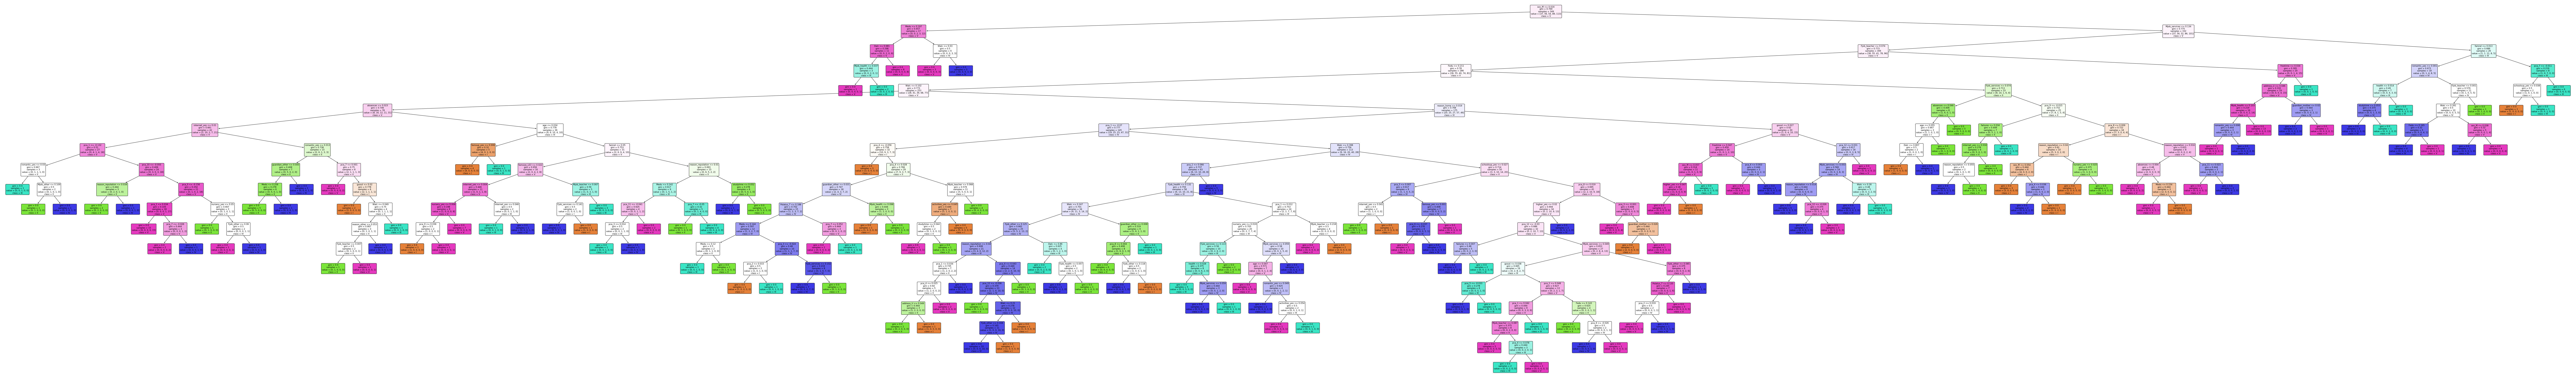

In [7]:
plot_dt(dt.best_estimator_)

Walc     pca_1  reason_reputation  Mjob_services  Mjob_teacher  \
0  0.069263  0.048228           0.047101       0.036973      0.032361   

   romantic_yes      Medu     sex_M  internet_yes     pca_4  ...  famsize_LE3  \
0      0.031148  0.030971  0.029773       0.02874  0.028467  ...     0.010396   

   famsup_yes  Pstatus_T  schoolsup_yes  guardian_mother     pca_0  \
0    0.010395   0.010235       0.009971         0.009933  0.005381   

   Mjob_other  reason_other  paid_yes  traveltime  
0    0.003725      0.003725       0.0         0.0  

[1 rows x 51 columns]

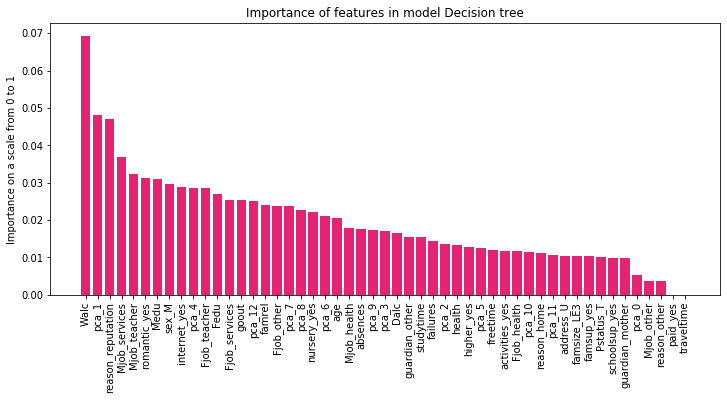

In [83]:
plot_fi(dt.best_estimator_, "Decision tree")

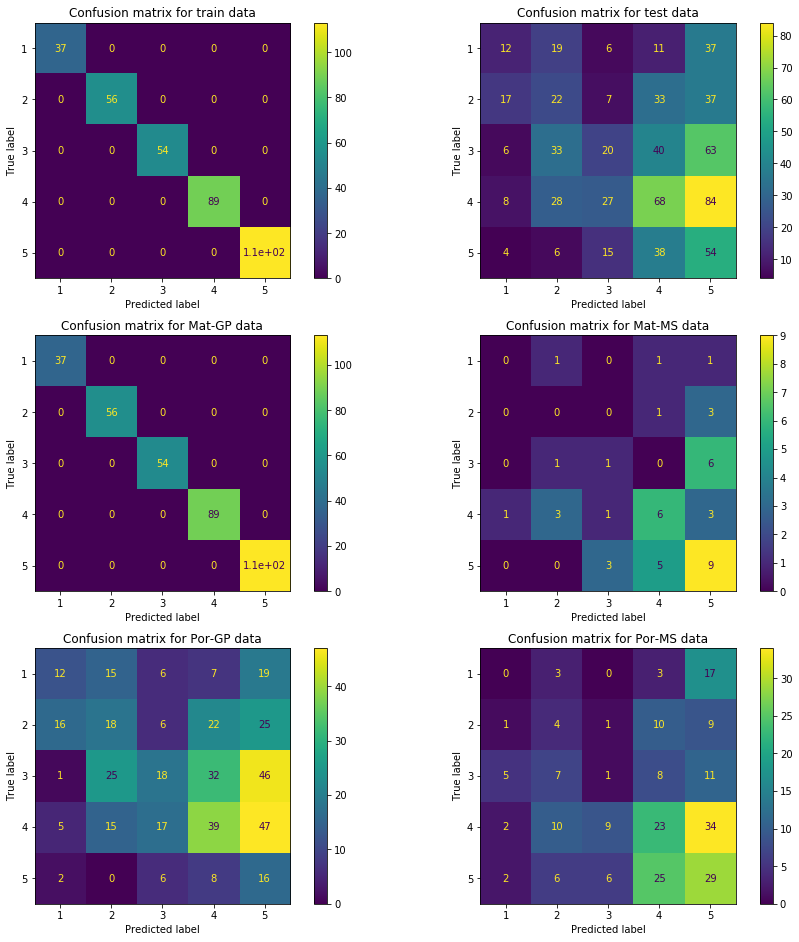

In [8]:
confusion_m(dt, "Decision tree")

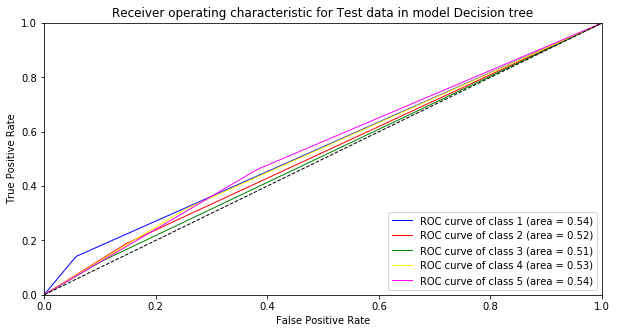

In [30]:
plot_roc(dt, "Decision tree")

Random Forest classifier
------

We only chose to test the following parameters:
 - `n_estimators`: from 10 to 110 in increments of 10
 - `max_depth`: 5, 10 or no max depth, to test if max depth or not max depth trees are better
 
We chose to not test any other parameters, because a random forest mostly gains its strength from a lot of simple-to-train trees and not from a perfectly tuned single tree.

In [10]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': range(10, 110, 10),
    'max_depth': [5, 10, None]
}

rf = gridsearch(RandomForestClassifier(), parameters)

training balanced_accuracy:  0.2600731527920786
testing balanced_accuracy:   0.2827961446334954
testing normal accuracy:     0.27482014388489207
balanced_accuracy for sperate parts of the data:


MatGP     MatMS     PorGP    PorMS
0    1.0  0.233613  0.307904  0.22564

best strategy:  {'max_depth': None, 'n_estimators': 80}


param_n_estimators param_max_depth  mean_test_score  std_test_score  \
27                 80            None         0.260073        0.042138   
12                 30              10         0.257989        0.045017   
10                 10              10         0.257339        0.042550   
14                 50              10         0.257124        0.039734   
22                 30            None         0.256959        0.051358   
24                 50            None         0.256801        0.040160   
25                 60            None         0.256527        0.033273   
18                 90              10         0.252817        0.035891   
19                100              10         0.252552        0.040973   
29                100            None         0.252357        0.040421   

    rank_test_score  
27                1  
12                2  
10                3  
14                4  
22                5  
24                6  
25                7  
18                8  
19                9  
29               10

pca_5    pca_12     pca_6     pca_1     pca_0     pca_7      Fedu  \
0  0.03335  0.032495  0.032459  0.032031  0.031683  0.031212  0.030201   

     pca_11  Mjob_other  Mjob_health  ...  internet_yes    health  \
0  0.030085    0.029979     0.029426  ...       0.01059  0.009115   

   guardian_mother  reason_home  guardian_other  failures  famsup_yes  \
0         0.008603     0.007325        0.005273  0.004082    0.003952   

   higher_yes  paid_yes  freetime  
0    0.003212  0.002788  0.001566  

[1 rows x 51 columns]

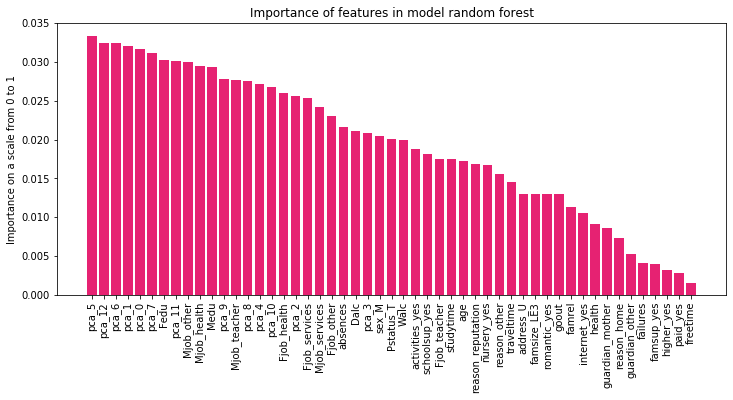

In [86]:
plot_fi(rf.best_estimator_, "random forest")

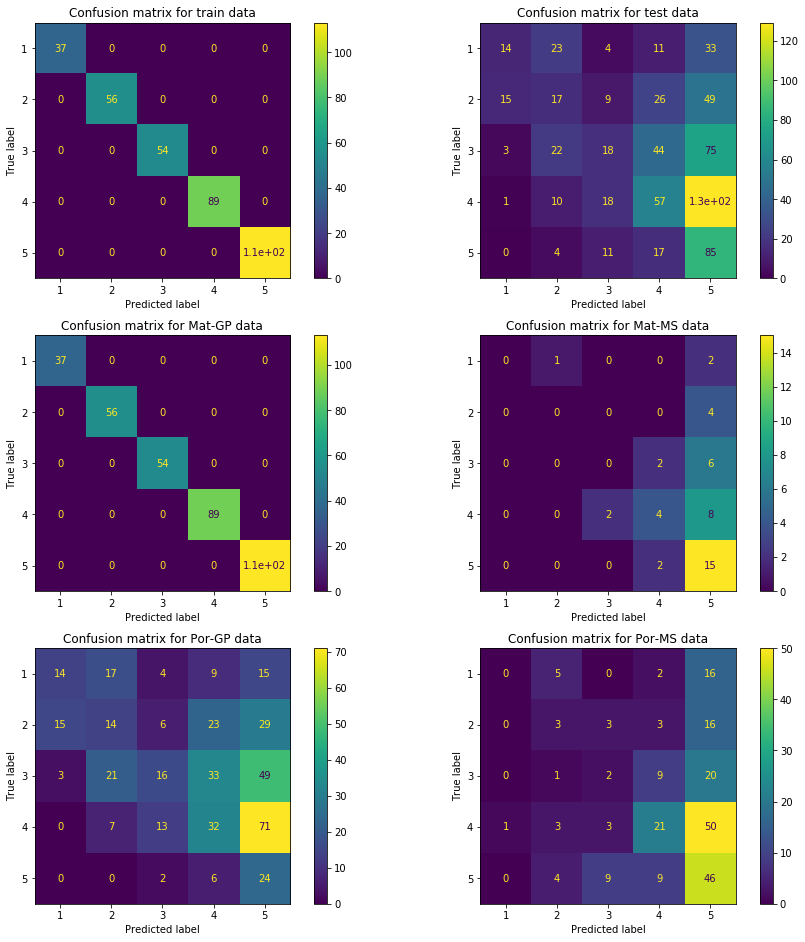

In [12]:
confusion_m(rf, "random forest")

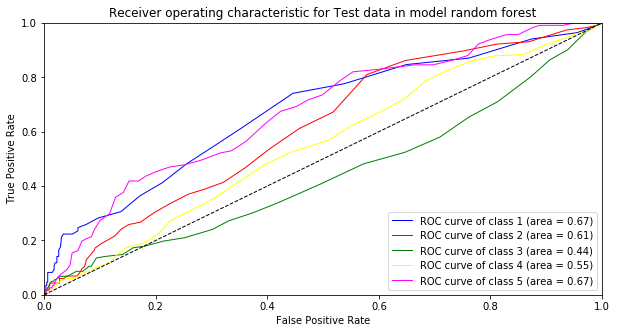

In [31]:
plot_roc(rf, "random forest")

Neural Network
------

We chose to test the following paramers:
 - `hidden_layer_sizes`: either no hidden layer or one hidden layer of sizes 2 to 20 in increments of 2, we chose to stay in the same range as was used in the paper to be able to properly compare
 - `activation`: The three main activation functions available: logistic, tanh and relu

The parameters `max_iter` was set to strike a balance between training time and accuracy, we wanted not too many max-iteration-reached-warnings. `solver` is set to lbgfs as the documentation says it is the best choice for small data sets.

In [14]:
from sklearn.neural_network import MLPClassifier

parameters = {
    'hidden_layer_sizes': [()] + [(x,) for x in range(2,20,2)],
    'activation' : ['logistic', 'tanh', 'relu'],
}

nn = gridsearch(MLPClassifier(max_iter=400, solver='lbfgs'), parameters)

training balanced_accuracy:  0.29133385037809595
testing balanced_accuracy:   0.283287163870682
testing normal accuracy:     0.26187050359712233
balanced_accuracy for sperate parts of the data:


/home/maglev/prj/builds/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MatGP     MatMS  PorGP     PorMS
0  0.485665  0.291457  0.303  0.232973

best strategy:  {'activation': 'tanh', 'hidden_layer_sizes': ()}


param_hidden_layer_sizes param_activation  mean_test_score  std_test_score  \
10                       ()             tanh         0.291334        0.052530   
0                        ()         logistic         0.291217        0.049417   
24                     (8,)             relu         0.291199        0.058999   
20                       ()             relu         0.289459        0.051205   
29                    (18,)             relu         0.287966        0.064514   
23                     (6,)             relu         0.286179        0.062948   
9                     (18,)         logistic         0.285337        0.053599   
28                    (16,)             relu         0.283923        0.060586   
6                     (12,)         logistic         0.280419        0.060657   
4                      (8,)         logistic         0.279389        0.048135   

    rank_test_score  
10                1  
0                 2  
24                3  
20                4  
29                5  
23                6  
9                 7  
28                8  
6                 9  
4                10

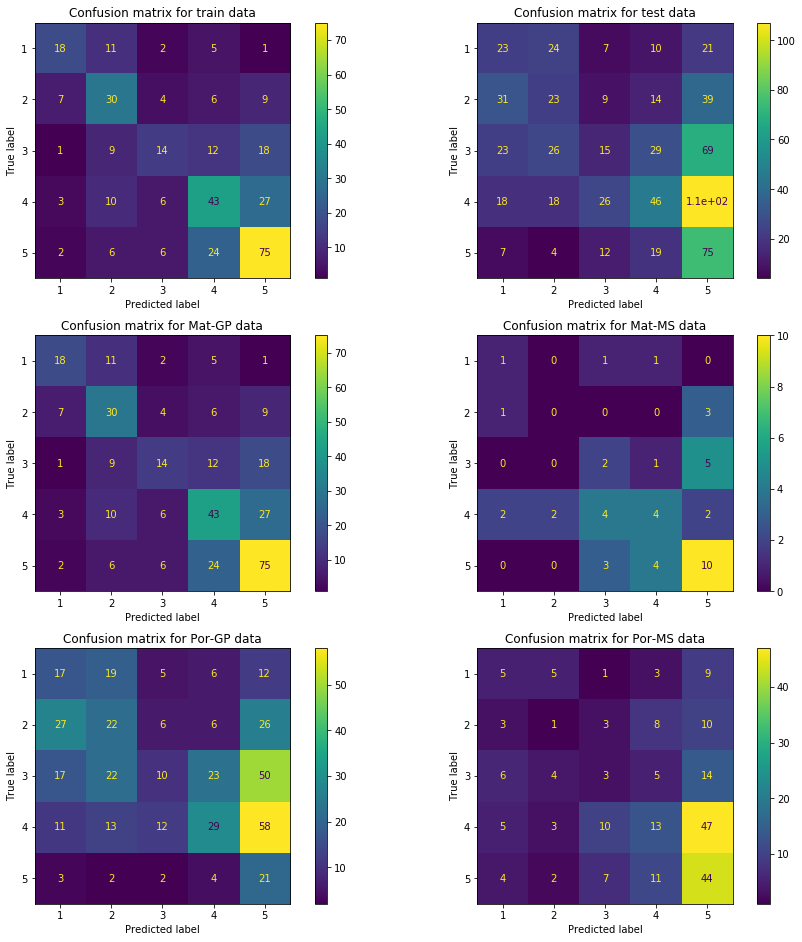

In [15]:
confusion_m(nn, "Multi layer perceptron")

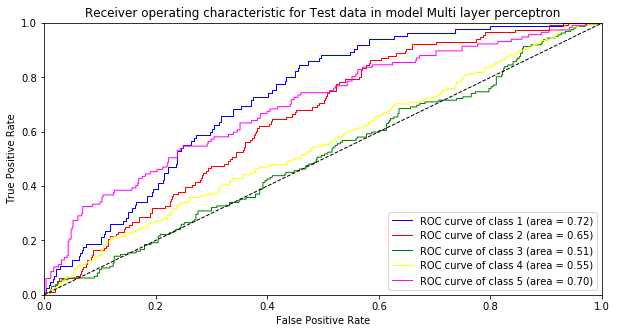

In [32]:
plot_roc(nn, "Multi layer perceptron")

Support Vector Machines
------

We chose the parameters
 - `kernel`: The four possible options: linear, poly, rbf and sigmoid
 - `gamma`: from $2^{-9}$ to $2^{-1}$ in a logarithmic scale, again chosen to be in the same range as the original paper

In [17]:
from sklearn.svm import SVC

parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : [2**(-x) for x in range(1,10)] + ['scale']
}

svm = gridsearch(SVC(class_weight='balanced'), parameters)

training balanced_accuracy:  0.26067698984732235
testing balanced_accuracy:   0.2537543085921154
testing normal accuracy:     0.25323741007194245
balanced_accuracy for sperate parts of the data:


MatGP     MatMS     PorGP     PorMS
0  0.434833  0.279202  0.248198  0.246715

best strategy:  {'gamma': 'scale', 'kernel': 'poly'}


param_kernel param_gamma  mean_test_score  std_test_score  rank_test_score
37         poly       scale         0.260677        0.055918                1
38          rbf       scale         0.249752        0.053784                2
2           rbf         0.5         0.243357        0.048435                3
0        linear         0.5         0.235278        0.044582                4
4        linear        0.25         0.235278        0.044582                4
36       linear       scale         0.235278        0.044582                4
32       linear  0.00195312         0.235278        0.044582                4
28       linear  0.00390625         0.235278        0.044582                4
8        linear       0.125         0.235278        0.044582                4
24       linear   0.0078125         0.235278        0.044582                4

In [18]:
confusion_m(svm, "support vector machines")

In [33]:
plot_roc(svm, "support vector machines")

K nearest neighbours
----

In [20]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': range(1,100, 5),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
    'p': range(1,4)
}

knn = gridsearch(KNeighborsClassifier(), parameters)

training balanced_accuracy:  0.3188281746954381
testing balanced_accuracy:   0.23823855987401438
testing normal accuracy:     0.2446043165467626
balanced_accuracy for sperate parts of the data:


MatGP     MatMS     PorGP     PorMS
0  0.471454  0.215546  0.230283  0.227357

best strategy:  {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


param_n_neighbors param_weights param_algorithm param_p  mean_test_score  \
246                 6       uniform           brute       1         0.318828   
366                 6       uniform            auto       1         0.318828   
6                   6       uniform       ball_tree       1         0.318828   
126                 6       uniform         kd_tree       1         0.318828   
8                   6       uniform       ball_tree       2         0.294292   
128                 6       uniform         kd_tree       2         0.294292   
368                 6       uniform            auto       2         0.294292   
248                 6       uniform           brute       2         0.294292   
7                   6      distance       ball_tree       1         0.290436   
367                 6      distance            auto       1         0.290436   

     std_test_score  rank_test_score  
246        0.055716                1  
366        0.055716                1  
6          0.055716                1  
126        0.055716                1  
8          0.052144                5  
128        0.052144                5  
368        0.052144                5  
248        0.052144                5  
7          0.050235                9  
367        0.050235                9

In [21]:
confusion_m(knn, "knn")

In [93]:
plot_roc(knn, "knn")

Adaboost
-----

In [23]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'base_estimator': [None, DecisionTreeClassifier(**dt.best_params_), RandomForestClassifier(**rf.best_params_)],
    'n_estimators': [10, 50, 100],
    'learning_rate': [.001, .01, .1],
}

ab = gridsearch(AdaBoostClassifier(), parameters)

training balanced_accuracy:  0.2604372080320929
testing balanced_accuracy:   0.24031729936552493
testing normal accuracy:     0.25611510791366904
balanced_accuracy for sperate parts of the data:


MatGP     MatMS     PorGP    PorMS
0  0.441139  0.292647  0.249322  0.19499

best strategy:  {'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 100}


param_base_estimator param_n_estimators  \
8                                                None                100   
14  DecisionTreeClassifier(ccp_alpha=0.0, class_we...                100   
18  RandomForestClassifier(bootstrap=True, ccp_alp...                 10   
23  RandomForestClassifier(bootstrap=True, ccp_alp...                100   
22  RandomForestClassifier(bootstrap=True, ccp_alp...                 50   
21  RandomForestClassifier(bootstrap=True, ccp_alp...                 10   
9   DecisionTreeClassifier(ccp_alpha=0.0, class_we...                 10   
24  RandomForestClassifier(bootstrap=True, ccp_alp...                 10   
25  RandomForestClassifier(bootstrap=True, ccp_alp...                 50   
19  RandomForestClassifier(bootstrap=True, ccp_alp...                 50   

   param_learning_rate  mean_test_score  std_test_score  rank_test_score  
8                  0.1         0.260437        0.047107                1  
14                0.01         0.258359        0.049683                2  
18               0.001         0.257576        0.043101                3  
23                0.01         0.256464        0.044877                4  
22                0.01         0.256325        0.045376                5  
21                0.01         0.255019        0.045790                6  
9                0.001         0.254418        0.059383                7  
24                 0.1         0.254028        0.042281                8  
25                 0.1         0.253958        0.039654                9  
19               0.001         0.253645        0.041443               10

pca_3  pca_1  Fjob_services  Mjob_other  pca_5  Mjob_health  Fedu  pca_8  \
0   0.09   0.09           0.07        0.07   0.06         0.05  0.05   0.05   

   absences  reason_home  ...  schoolsup_yes  guardian_mother  reason_other  \
0      0.05         0.04  ...            0.0              0.0           0.0   

   Walc  Fjob_other  Fjob_health  Mjob_services  health  Pstatus_T  age  
0   0.0         0.0          0.0            0.0     0.0        0.0  0.0  

[1 rows x 51 columns]

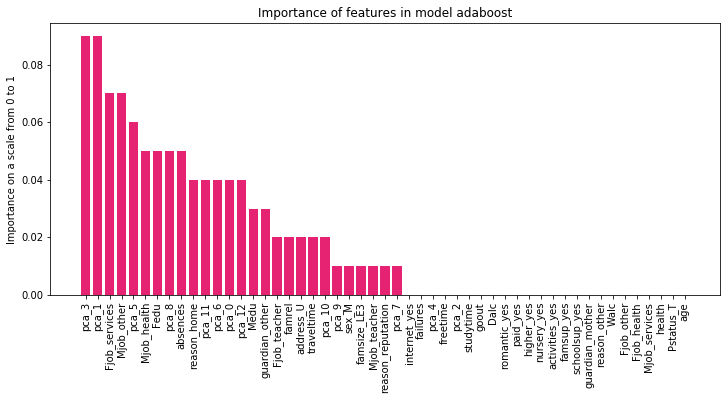

In [90]:
plot_fi(ab.best_estimator_, "adaboost")

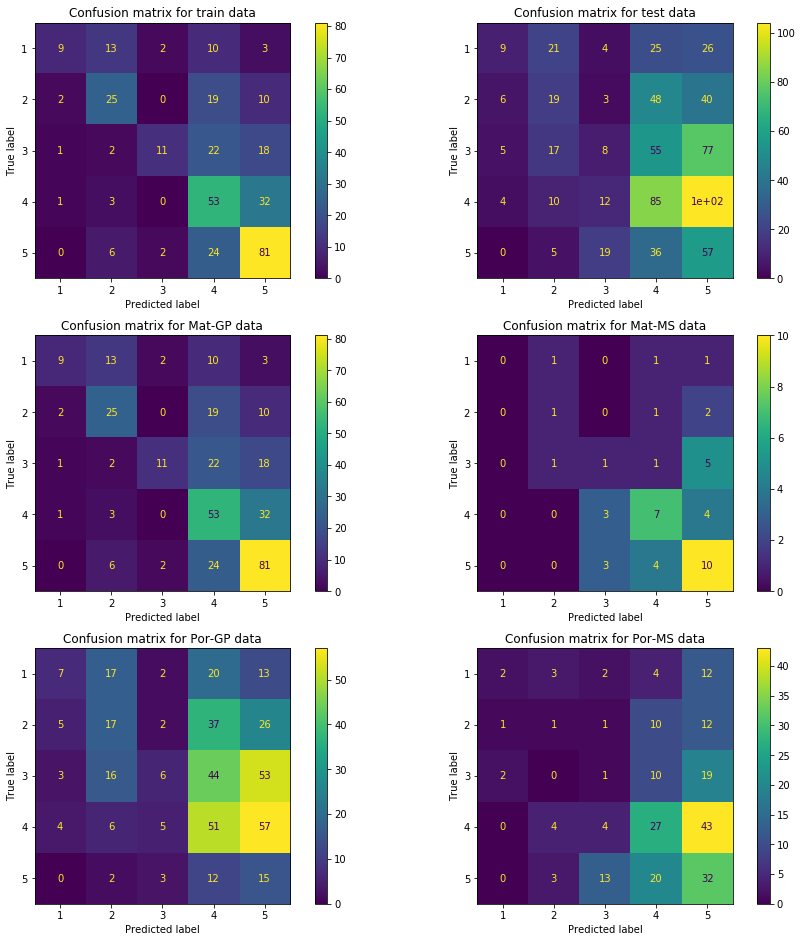

In [24]:
confusion_m(ab, "adaboost")

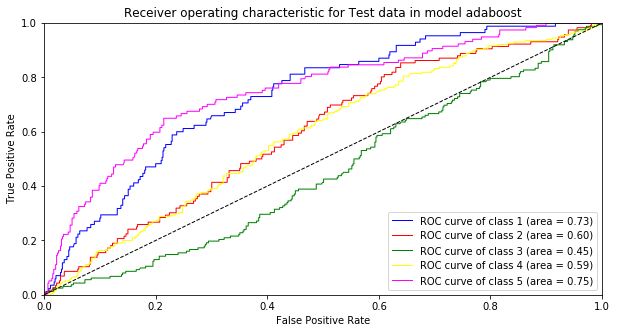

In [35]:
plot_roc(ab, "adaboost")

Gradient boost
-----

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [100],
    'learning_rate': [.1],
    'subsample': [0.8, 1],
    'max_depth': range(1, 20, 2),
    'init': [RandomForestClassifier(**rf.best_params_), MLPClassifier(**nn.best_params_), 'zero']
}

gb = gridsearch(GradientBoostingClassifier(), parameters)

/home/maglev/prj/builds/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training balanced_accuracy:  0.27937125659222845
testing balanced_accuracy:   0.26070596648312583
testing normal accuracy:     0.25611510791366904
balanced_accuracy for sperate parts of the data:


MatGP     MatMS     PorGP     PorMS
0    1.0  0.190546  0.268359  0.241389

best strategy:  {'init': MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


param_n_estimators param_learning_rate param_subsample param_max_depth  \
23                100                 0.1               1               3   
40                100                 0.1             0.8               1   
43                100                 0.1               1               3   
20                100                 0.1             0.8               1   
26                100                 0.1             0.8               7   
27                100                 0.1               1               7   
48                100                 0.1             0.8               9   
46                100                 0.1             0.8               7   
42                100                 0.1             0.8               3   
8                 100                 0.1             0.8               9   

                                           param_init  mean_test_score  \
23  MLPClassifier(activation='tanh', alpha=0.0001,...         0.279371   
40                                               zero         0.276384   
43                                               zero         0.276217   
20  MLPClassifier(activation='tanh', alpha=0.0001,...         0.275919   
26  MLPClassifier(activation='tanh', alpha=0.0001,...         0.272262   
27  MLPClassifier(activation='tanh', alpha=0.0001,...         0.272083   
48                                               zero         0.271354   
46                                               zero         0.270900   
42                                               zero         0.270658   
8   RandomForestClassifier(bootstrap=True, ccp_alp...         0.270436   

    std_test_score  rank_test_score  
23        0.041062                1  
40        0.042419                2  
43        0.038865                3  
20        0.038291                4  
26        0.045219                5  
27        0.045289                6  
48        0.045228                7  
46        0.038162                8  
42        0.039860                9  
8         0.042524               10

pca_10     pca_3     pca_8    pca_12  Fjob_services  Mjob_health    pca_1  \
0  0.04858  0.044586  0.042918  0.042175       0.040822     0.040373  0.03995   

     pca_11  Fjob_teacher  absences  ...  schoolsup_yes  failures  \
0  0.038329      0.037519  0.035371  ...       0.006679  0.004705   

   guardian_mother  higher_yes  freetime  famsup_yes     goout  nursery_yes  \
0         0.004687    0.004084  0.004056    0.003032  0.002268      0.00201   

   paid_yes    health  
0  0.001112  0.000471  

[1 rows x 51 columns]

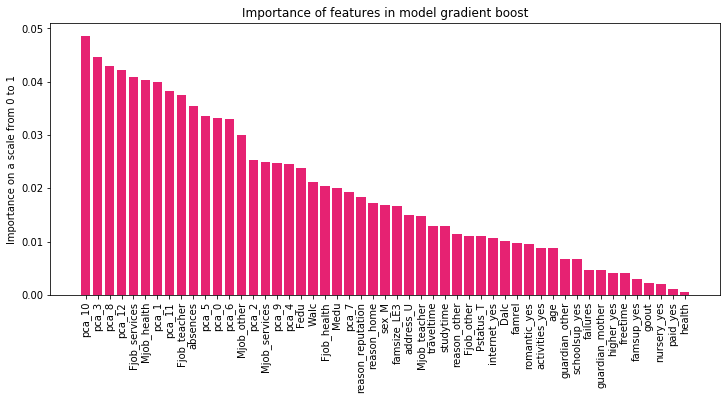

In [91]:
plot_fi(gb.best_estimator_, "gradient boost")

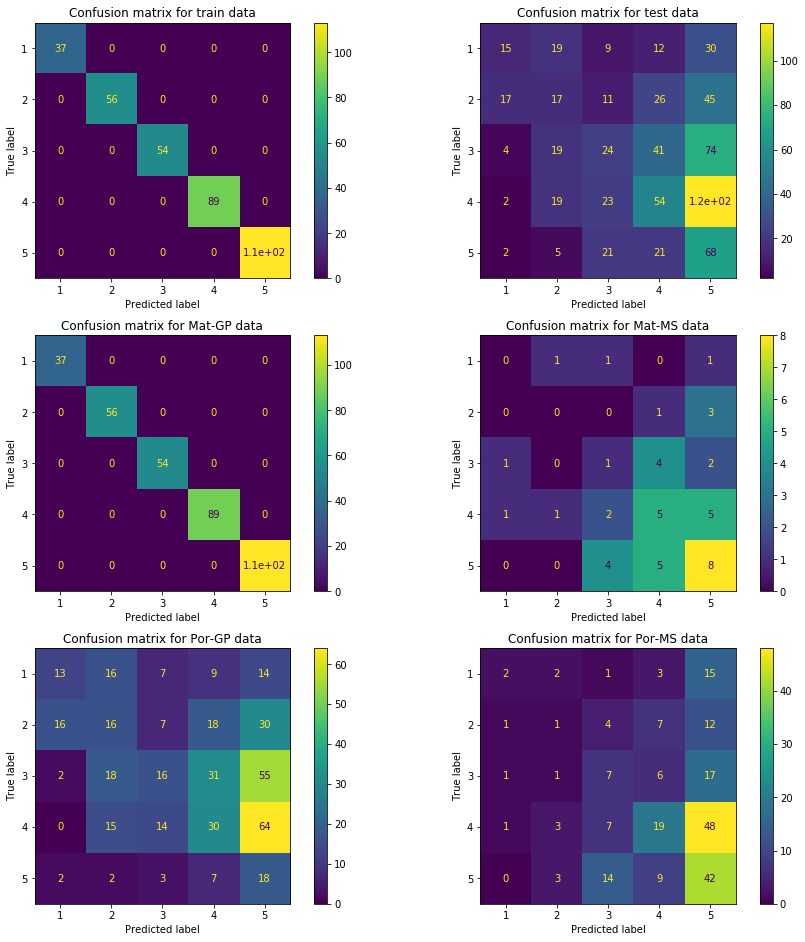

In [27]:
confusion_m(gb, "gradient boost")

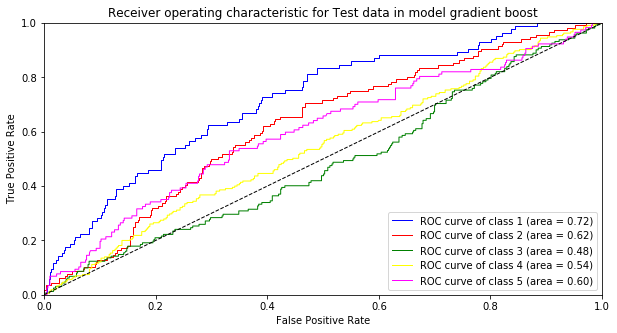

In [36]:
plot_roc(gb, "gradient boost")